In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font', family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

mlp.rcParams['agg.path.chunksize'] = 1500000

## 영화 평점 분석 주제 

- 사람들이 가장 많이 본 영화 top10, 가장 평점이 높은 영화 top10
    - 사람들이 많이 본 영화 즉 인기 있는 영화가 작품성도 좋을까?

<br/>

- 나이에 대한 animation 장르와의 평점 관계
    - 오히려 나이대가 올라가면 올라갈수록 어릴적 향수에 젖어 animation 장르에 대한 평점이 좋지 않을까?


<br/>

- 과학자들은 sci-fi 영화의 평점을 어떻게 줬을까?
    - 요즘 변호사가 리뷰하는 법정 드라마, 의사들이 리뷰하는 의학 드라마 컨텐츠들이 많이 있는데 과학자들은 공상과학 영화를 어떻게 평가 했을까...


# 1.데이터 준비
https://grouplens.org/datasets/movielens/ 
-ml-1m.zip(size : 6NB, checksum)

### Rating 파일

In [2]:
ratings = pd.read_csv("data/ml-1m/ratings.dat", delimiter = "::", names = ["UserID","MovieID","Rating","Timestamp"] )
ratings

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_11968\4167975982.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("data/ml-1m/ratings.dat", delimiter = "::", names = ["UserID","MovieID","Rating","Timestamp"] )


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


### users 파일

In [3]:
users = pd.read_csv("data/ml-1m/users.dat", delimiter = "::", names = ["UserID", "Gender", "Age", "Occupation", "Zip-code"])
users

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_11968\907451035.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("data/ml-1m/users.dat", delimiter = "::", names = ["UserID", "Gender", "Age", "Occupation", "Zip-code"])


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


### movies 파일

In [4]:
movies = pd.read_csv("data/ml-1m/movies.dat", sep = "::", encoding = "ISO-8859-1", names=["MovieID","title","genre"])
movies

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_11968\475507716.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("data/ml-1m/movies.dat", sep = "::", encoding = "ISO-8859-1", names=["MovieID","title","genre"])


,MovieID,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
movie_year = movies["title"].apply(lambda x:x[-5:-1])
movies["release_year"] =  movie_year
movies

,MovieID,title,genre,release_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [6]:
## 정리된 파일 중간 저장
# movies.to_csv("data/movie/tempmovieyear.csv", index=False)

### ReadMe 파일에서 Age, Occupation 정보 파일로 만들기

In [7]:
### 양이 얼마 안돼서 메모장으로 occupation파일 만든 것 다시 불러옴
# id: occupation을 나타내는 number
# 다른 DataFrame과 merge하기 위해서 이름 바꿔줌
occupation = pd.read_csv("data/movie/occupation.csv")
occupation.rename(columns = {"id":"Occupation"}, inplace=True)
occupation

,Occupation,occupation
0,0,other or not specified
1,1,academic/educator
2,2,artist
3,3,clerical/admin
4,4,college/grad student
5,5,customer service
6,6,doctor/health care
7,7,executive/managerial
8,8,farmer
9,9,homemaker


In [8]:
### 양이 얼마 안돼서 메모장으로 age파일 만든 것 다시 불러옴
# 그대로 긁어온 것이라서 ':'로 표시되어 있음
# 다른 DataFrame과 merge하기 위해서 이름 바꿔줌
age = pd.read_csv("data/movie/age.csv", delimiter=":")
age.rename(columns = {"age":"Age"}, inplace=True)
age.rename(columns = {"range":"Age_range"}, inplace=True)
age

,Age,Age_range
0,1,Under 18
1,18,18-24
2,25,25-34
3,35,35-44
4,45,45-49
5,50,50-55
6,56,56+


### 데이터 파일들 합치기

- 필요한 데이터들 끼리 합치고 분리해서 사용하기 쉬운 파일로 변경

In [9]:
## 어떤 사람이 어떻게 평점을 매겼는지 확인(1차 merge)
movie_rating = users.merge(ratings,how='inner',on='UserID')

In [10]:
## 사람, 평점 모아놓은 것과 평점을 매긴 영화가 뭔지 확인(2차 merge)
movie_rating = movie_rating.merge(movies, how="inner", on="MovieID")
movie_rating

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,title,genre,release_year
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary,1998
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama,1998
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama,1999
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,1973


In [11]:
## 전체 정보 모아놓은 파일 1차 저장
#movie_rating.to_csv("data/movie/movie_rating_all.csv", index=False,  encoding = "utf-8")

In [12]:
## 정해진 주제에 필요한 데이터만 남기고 삭제
del movie_rating["Zip-code"]
del movie_rating["Timestamp"]
del movie_rating["release_year"]
movie_rating

,UserID,Gender,Age,Occupation,MovieID,Rating,title,genre
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,5,Modulations (1998),Documentary
1000205,5675,M,35,14,2703,3,Broken Vessels (1998),Drama
1000206,5780,M,18,17,2845,1,White Boys (1999),Drama
1000207,5851,F,18,20,3607,5,One Little Indian (1973),Comedy|Drama|Western


In [13]:
## 필요한 데이터만 남긴 DataFrame 저장
#movie_rating.to_csv("data/movie/movie_ratings.csv", index=False, encoding="utf-8")

In [14]:
## 원래 파일에 없었던 Occupation에 관한 정보 합치기
# 분석하면서 보기 쉽게
# 컬럼순서 원하는 순서로 바꾸기
movie_rating = movie_rating.merge(age, how="inner", on="Age")
movie_rating = movie_rating.merge(occupation, how="inner", on="Occupation" )
movie_rating = movie_rating[["UserID","Gender","Age","Occupation","occupation","MovieID","Rating","title","genre"]]
movie_rating

,UserID,Gender,Age,Occupation,occupation,MovieID,Rating,title,genre
0,1,F,1,10,K-12 student,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,19,M,1,10,K-12 student,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,99,F,1,10,K-12 student,1193,2,One Flew Over the Cuckoo's Nest (1975),Drama
3,349,M,1,10,K-12 student,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,960,M,1,10,K-12 student,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...
1000204,1976,M,35,5,customer service,1849,2,Prince Valiant (1997),Adventure
1000205,2994,M,35,5,customer service,1181,2,"Shooter, The (1995)",Action
1000206,2565,M,35,5,customer service,815,4,Power 98 (1995),Action|Mystery|Thriller
1000207,4725,M,35,5,customer service,1532,3,Sprung (1997),Comedy


In [15]:
## 원래 파일에 없었던 Age에 관한 정보 합치기
# 분석하면서 보기 쉽게
# 컬럼순서 원하는 순서로 바꾸기
movie_rating = movie_rating.merge(age, how="inner", on="Age")

In [16]:
#movie_rating = movie_rating[["UserID","Gender","Age","Age_range","Occupation","occupation","MovieID","Rating","title","genre"]]
#원인을 알 수 없음(Age_range가 원하는 순서대로 컬럼이 바뀌지 않음
movie_rating

,UserID,Gender,Age,Occupation,occupation,MovieID,Rating,title,genre,Age_range
0,1,F,1,10,K-12 student,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,19,M,1,10,K-12 student,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
2,99,F,1,10,K-12 student,1193,2,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
3,349,M,1,10,K-12 student,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
4,960,M,1,10,K-12 student,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
...,...,...,...,...,...,...,...,...,...,...
1000204,4447,M,45,5,customer service,3757,3,Asylum (1972),Horror,45-49
1000205,2484,M,45,5,customer service,2257,2,No Small Affair (1984),Comedy|Romance,45-49
1000206,3407,F,45,5,customer service,3492,2,"Son of the Sheik, The (1926)",Adventure,45-49
1000207,2484,M,45,5,customer service,3642,3,In Old California (1942),Western,45-49


In [17]:
## 정보를 담은 DataFrame 저장해 둠
#movie_rating.to_csv("data/movie/movie_rating_info.csv", index=False, encoding="utf-8")

# 2. 데이터 분석

## 2-1. 영화 선호도와 평점의 관계

- 사람들이 가장 많이 본 영화 top10, 가장 평점이 높은 영화 top10
    - 사람들이 많이 본 영화 즉 인기 있는 영화가 작품성도 좋을까?

In [18]:
## 원하는 정보가 담긴 파일 불러오기
# 평점과 영화 정보만 담겨져 있으면 됨

movie = pd.read_csv("data/movie/movie_ratings.csv")

### 가장 많이 본 영화 

In [19]:
## 평점 매겨진 영화 각 영화별 개수 구하기 

view_count = movie.groupby(movie.MovieID).count()["title"]
view_count

MovieID
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: title, Length: 3706, dtype: int64

In [20]:
## DataFrame으로 만들고 index와 컬럼 정리

view_count = pd.DataFrame(view_count)

view_count.columns = ["view_count"]
view_count.reset_index(inplace = True)

view_count

,MovieID,view_count
0,1,2077
1,2,701
2,3,478
3,4,170
4,5,296
...,...,...
3701,3948,862
3702,3949,304
3703,3950,54
3704,3951,40


In [21]:
## 전체 데이터가 잘 들어갔는지 확인
view_count.sum()

MovieID       7395594
view_count    1000209
dtype: int64

### 가장 평점이 좋은 영화 

In [22]:
## 영화별 평점 구하기
rating_mean = movie.groupby(["MovieID"]).mean()["Rating"]
rating_mean

MovieID
1       4.146846
2       3.201141
3       3.016736
4       2.729412
5       3.006757
          ...   
3948    3.635731
3949    4.115132
3950    3.666667
3951    3.900000
3952    3.780928
Name: Rating, Length: 3706, dtype: float64

In [23]:
## DataFrame으로 만들고 index와 컬럼 정리

rating_mean = pd.DataFrame(rating_mean)

rating_mean.columns = ["rating"]
rating_mean.reset_index(inplace = True)

rating_mean

,MovieID,rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757
...,...,...
3701,3948,3.635731
3702,3949,4.115132
3703,3950,3.666667
3704,3951,3.900000


In [24]:
## 전체 데이터가 잘 들어갔는지 확인
rating_mean.sum()

MovieID    7.395594e+06
rating     1.200333e+04
dtype: float64

### 영화별 선호도, 평점 비교

#### 많이본 영화, 평점이 좋은 영화 top10끼리 비교

In [25]:
view_count = view_count.sort_values(by="view_count", ascending = False)
viewtop10=view_count.head(10)
viewtop10

,MovieID,view_count
2651,2858,3428
253,260,2991
1106,1196,2990
1120,1210,2883
466,480,2672
1848,2028,2653
575,589,2649
2374,2571,2590
1178,1270,2583
579,593,2578


In [26]:
rating_mean = rating_mean.sort_values(by="rating", ascending = False)
ratingtop10=rating_mean.head(10)
ratingtop10

,MovieID,rating
926,989,5.0
3635,3881,5.0
1652,1830,5.0
3152,3382,5.0
744,787,5.0
3054,3280,5.0
3367,3607,5.0
3010,3233,5.0
2955,3172,5.0
3414,3656,5.0


In [27]:
### top 10끼리 겹치는 게 있는지 확인 ###
viewtop10.sort_values(by="MovieID", inplace=True)
viewtop10.reset_index(inplace= True, drop=True)
viewtop10

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_11968\4060288444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viewtop10.sort_values(by="MovieID", inplace=True)


,MovieID,view_count
0,260,2991
1,480,2672
2,589,2649
3,593,2578
4,1196,2990
5,1210,2883
6,1270,2583
7,2028,2653
8,2571,2590
9,2858,3428


In [28]:
ratingtop10.sort_values(by="MovieID", inplace=True)
ratingtop10.reset_index(inplace= True, drop=True)
ratingtop10

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_11968\1031485920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratingtop10.sort_values(by="MovieID", inplace=True)


,MovieID,rating
0,787,5.0
1,989,5.0
2,1830,5.0
3,3172,5.0
4,3233,5.0
5,3280,5.0
6,3382,5.0
7,3607,5.0
8,3656,5.0
9,3881,5.0


In [29]:
movietop10 = pd.merge(ratingtop10, viewtop10, left_index=True, right_index=True, how='left')
movietop10
## 겹치는 게 없음을 확인할 수 있다

,MovieID_x,rating,MovieID_y,view_count
0,787,5.0,260,2991
1,989,5.0,480,2672
2,1830,5.0,589,2649
3,3172,5.0,593,2578
4,3233,5.0,1196,2990
5,3280,5.0,1210,2883
6,3382,5.0,1270,2583
7,3607,5.0,2028,2653
8,3656,5.0,2571,2590
9,3881,5.0,2858,3428


#### 선호도가 높은 영화와 평점이 높은 영화 전체 비교

In [30]:
movietop = view_count.merge(rating_mean,how='inner',on='MovieID')
movietop

,MovieID,view_count,rating
0,2858,3428,4.317386
1,260,2991,4.453694
2,1196,2990,4.292977
3,1210,2883,4.022893
4,480,2672,3.763847
...,...,...,...
3701,3237,1,1.000000
3702,763,1,3.000000
3703,624,1,4.000000
3704,2563,1,3.000000


MovieID       2033.500000
view_count     123.500000
rating           3.331546
dtype: float64
MovieID       1995.573125
view_count     269.889099
rating           3.238892
dtype: float64


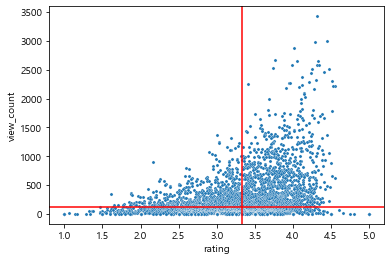

In [31]:
# 산포도로 표시
# 중앙값 기준으로 사분면 표시
sns.scatterplot(x="rating", y="view_count", data=movietop, s=10)
plt.axvline(x=3.331546, color = "red")
plt.axhline(y=123.5, color="red")

# 영화 별 관람 수 중앙값확인
print(movietop.median())
print(movietop.mean())

In [32]:
print(movietop[(movietop["view_count"]>=123.5)&(movietop["rating"]>=3.331546)])
print(movietop[(movietop["view_count"]<123.5)&(movietop["rating"]<3.331546)])
round((1135+1135)/3706*100,3)
## 평점 상위 50%와 관람 횟수 상위 50%를 동시에 만족하는 영화는 30.626%
## 평점 하위 50%와 관람 횟수 하위 50%를 동시에 만족하는 영화 30.626%

      MovieID  view_count    rating
0        2858        3428  4.317386
1         260        2991  4.453694
2        1196        2990  4.292977
3        1210        2883  4.022893
4         480        2672  3.763847
...       ...         ...       ...
1844     1465         126  3.492063
1848     2280         125  3.432000
1849     3925         124  3.854839
1851     3182         124  3.959677
1852     1484         124  3.701613

[1135 rows x 3 columns]
      MovieID  view_count    rating
1853     1018         123  3.252033
1854     2498         123  2.333333
1855      761         123  2.788618
1857     2170         123  2.552846
1858     3690         122  2.040984
...       ...         ...       ...
3700     1579           1  3.000000
3701     3237           1  1.000000
3702      763           1  3.000000
3704     2563           1  3.000000
3705     3290           1  3.000000

[1135 rows x 3 columns]


61.252

In [33]:
print(movietop[(movietop["view_count"]>=123.5)&(movietop["rating"]<3.331546)])
print(movietop[(movietop["view_count"]<123.5)&(movietop["rating"]>=3.331546)])
round((718+718)/3706*100, 3)
# 반대의 경향을 나타내는 부분은 총 38.748%

      MovieID  view_count    rating
91       2699        1367  3.002926
108      3623        1313  3.195735
115      1544        1255  3.036653
120      2710        1237  3.031528
121      2657        1233  3.291160
...       ...         ...       ...
1842     1024         126  3.246032
1845     2337         126  3.206349
1846       23         126  2.857143
1847     2817         125  1.640000
1850      547         124  2.879032

[718 rows x 3 columns]
      MovieID  view_count    rating
1856      213         123  4.056911
1859     1938         122  3.909836
1860     3604         122  3.696721
1863     2436         122  3.590164
1864     1305         121  3.793388
...       ...         ...       ...
3683      774           1  4.000000
3691     3277           1  4.000000
3693     3530           1  4.000000
3696      139           1  4.000000
3703      624           1  4.000000

[718 rows x 3 columns]


38.748

In [34]:
## 둘 다 평균 이상 or 평균 이하
up = movietop[(movietop["view_count"]>=movietop["view_count"].mean())&(movietop["rating"]>=movietop["rating"].mean())]
down = movietop[(movietop["view_count"]<movietop["view_count"].mean())&(movietop["rating"]<movietop["rating"].mean())]
a = len(up)+len(down)

print("관계 있다:", round(a/3706*100, 3))

## 관계 없다

notup = movietop[(movietop["view_count"]>=movietop["view_count"].mean())&(movietop["rating"]<movietop["rating"].mean())]
notdown = movietop[(movietop["view_count"]<movietop["view_count"].mean())&(movietop["rating"]>=movietop["rating"].mean())]
nota = len(notup)+len(notdown)
print("관계 없다:", round(nota/3706*100, 3))

관계 있다: 60.739
관계 없다: 39.261


In [35]:
data = {"중앙값기준":[61.252, 38.748], "평균기준":[60.739, 39.261]}
relative = pd.DataFrame(data, index=["관계 있다", "관계 없다"])
relative = relative.T
relative

,관계 있다,관계 없다
중앙값기준,61.252,38.748
평균기준,60.739,39.261


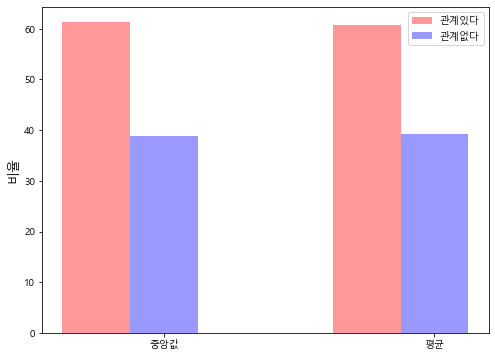

In [36]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.25

# 값이 중앙값, 평균 2개이므로 0, 1 위치를 기준으로 삼음
index = np.arange(2)

# bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, relative['관계 있다'], bar_width, alpha=0.4, color='red', label='관계있다')

b2 = plt.bar(index + bar_width, relative['관계 없다'], bar_width, alpha=0.4, color='blue', label='관계없다')


# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 정보와 매칭
plt.xticks(np.arange(bar_width, 2+bar_width, 1), ["중앙값", "평균" ])

# # x축, y축 이름 및 범례 설정
plt.ylabel('비율', size = 13)
plt.legend()
plt.show()

In [37]:
## 전체 3706개의 영화 중 25%에 해당하는 곳 표시

# 25%기준인 이유 >> 최근 중학교 내신 A등급을 25% 기준으로 표시 >> 상위권으로 잡음
# 3706*0.25 = 926.5 >> 926위 확인

# 영화 별 관람 수 상위 25%확인
movietop.sort_values(by="view_count", ascending = False).head(926) 
# 351회 관람된 영화까지

# 영화 별 평점 상위 25% 확인
movietop.sort_values(by="rating", ascending = False).head(926) 
#3.740741인 영화까지

,MovieID,view_count,rating
3601,3881,1,5.000000
3672,1830,1,5.000000
3595,989,1,5.000000
3662,3382,1,5.000000
3622,3607,1,5.000000
...,...,...,...
2034,2239,97,3.742268
2805,2938,31,3.741935
2410,959,58,3.741379
2133,3713,85,3.741176


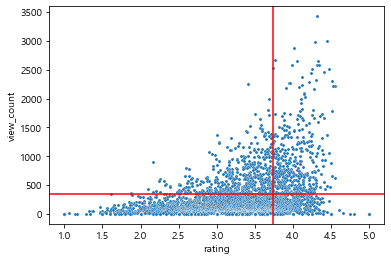

In [38]:
## 산포도에 25% 범위 표시해서 rating과 view_count가 겹친 영화들 확인

sns.scatterplot(x="rating", y="view_count", data=movietop, s=10)
plt.axvline(x=3.740741, color = "red")
plt.axhline(y=351, color="red")

In [39]:
## 두 개 중복된 개수 구하기 

movietop[(movietop["view_count"]>=351)&(movietop["rating"]>=3.740741)]
# 401개
# 3706개 영화 중 401개
#round(401/3706*100, 3) = 10.82
#평점과 관람 횟수 모두 상위 25%의 값을 가지는 영화는 401개로 10.82%

,MovieID,view_count,rating
0,2858,3428,4.317386
1,260,2991,4.453694
2,1196,2990,4.292977
3,1210,2883,4.022893
4,480,2672,3.763847
...,...,...,...
909,3505,355,3.873239
912,3152,354,3.971751
918,3067,353,3.892351
921,3062,352,3.971591


### 결과 해석

- 결과 1. 평점 top10과 많이 본 영화 top10은 같은 영화가 없다

<br/>

- 결과 2. 산포도 확인
    - 산포도를 확인했을 때 둘이 연관이 있다면 사분면 기준으로 제 1사분면의 개수가 많아야 한다.(1사분면 : 관람횟수가 높은 영화가 평점도 높다)
    - 그 개수는 1135개로 30.626%이다. 
    
<br/>
    
- 결과 3. 중앙값, 평균을 기준으로 한 관계 있음, 없음을 나타냄
    - 중앙값이나 평균으로 나눴을 때 1사분면과 3사분면의 영화 개수가 2사분면과 4사분면의 개수보다 많다면 관계가 있다고 볼 수 있다
        - 1사분면 : 관람횟수가 높은 영화가 평점도 높다
        - 3사분면 : 관람횟수가 낮은 영화가 평점도 낮다
        - 2사분면 : 평점이 낮은 영화가 관람횟수가 높다
        - 4사분면 : 평점이 높은 영화가 관람횟수가 낮다
    - 1,3사분면과 2,4 사분면에 해당하는 영화의 개수의 전체 비율을 확인하면 60%, 40%로 의미가 있다고 볼 수 있다.
    
<br/>
    
- 결과 4. 상위 25% 산포도 확인
    - 평점과 관람횟수 모두 상위 25%를 가지는 영화는 401개로 10.82%이다.


#### 결과를 종합적으로 봤을 때 관련이 아예없다고 볼 수는 없고 60%, 40%정도로 어느정도는 관계가 있지만 그 차이가 크진 않아서 큰 영향을 미치지 않는다고 볼 수 있다.

<br/>

----

## 2-2. 애니메이션을 본 사람들의 나이대와 평점 분석

- 애니메이션을 가장 많이 보는 나이대(나이대별 애니메이션 선호도)
    - 나이가 어릴 수록 애니메이션을 많이 볼 것인가? 아니면 반대로 나이가 많은 사람들도 좋아할까
   
- 애니메이션을 본 사람들의 수와 평점 사이에 관련이 있을까

### 애니메이션 영화 뽑아내기

### (1) genre값이 묶여있으므로 분리해주기

In [40]:
movies = pd.read_csv("data/ml-1m/movies.dat", sep = "::", encoding = "ISO-8859-1", names=["MovieID","title","genre"])
movies

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_11968\475507716.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("data/ml-1m/movies.dat", sep = "::", encoding = "ISO-8859-1", names=["MovieID","title","genre"])


,MovieID,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [41]:
movie = movies[["MovieID","genre"]]
movie

,MovieID,genre
0,1,Animation|Children's|Comedy
1,2,Adventure|Children's|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama
4,5,Comedy
...,...,...
3878,3948,Comedy
3879,3949,Drama
3880,3950,Drama
3881,3951,Drama


In [42]:
genre = movie["genre"].str.split("|")
genre

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genre, Length: 3883, dtype: object

In [43]:
genre = pd.DataFrame(i for i in genre)
genre

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [44]:
genre.columns=["genre1","genre2","genre3","genre4","genre5","genre6"]
genre

,genre1,genre2,genre3,genre4,genre5,genre6
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [45]:
genre["MovieID"]=movie["MovieID"]
genre

,genre1,genre2,genre3,genre4,genre5,genre6,MovieID
0,Animation,Children's,Comedy,None,None,None,1
1,Adventure,Children's,Fantasy,None,None,None,2
2,Comedy,Romance,None,None,None,None,3
3,Comedy,Drama,None,None,None,None,4
4,Comedy,None,None,None,None,None,5
...,...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None,3948
3879,Drama,None,None,None,None,None,3949
3880,Drama,None,None,None,None,None,3950
3881,Drama,None,None,None,None,None,3951


In [46]:
#장르 분리한 것 저장
#genre.to_csv("data/movie/movie_genre.csv", index=False, encoding="utf-8")

### (2) genre가 Animation인 영화 찾기
- genre가 abc순서로 되어 있으므로 몇번째 장르까지 animation이 포함되어있는지 확인

In [47]:
genre1 = genre.sort_values(by="genre1")
genre1

,genre1,genre2,genre3,genre4,genre5,genre6,MovieID
2513,Action,Comedy,None,None,None,None,2582
1489,Action,Adventure,Children's,Fantasy,None,None,1525
1487,Action,Crime,Romance,None,None,None,1523
1483,Action,Thriller,None,None,None,None,1518
430,Action,Adventure,Crime,None,None,None,434
...,...,...,...,...,...,...,...
549,Western,None,None,None,None,None,553
3573,Western,None,None,None,None,None,3642
1859,Western,None,None,None,None,None,1928
3737,Western,None,None,None,None,None,3806


In [48]:
genre3 = genre.sort_values(by="genre3")
genre3

,genre1,genre2,genre3,genre4,genre5,genre6,MovieID
2931,Action,Adventure,Animation,None,None,None,3000
554,Action,Adventure,Animation,Children's,Fantasy,None,558
606,Action,Adventure,Animation,Horror,Sci-Fi,None,610
2651,Action,Adventure,Children's,Comedy,None,None,2720
542,Action,Adventure,Children's,Sci-Fi,None,None,546
...,...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None,3948
3879,Drama,None,None,None,None,None,3949
3880,Drama,None,None,None,None,None,3950
3881,Drama,None,None,None,None,None,3951


In [49]:
genre4 = genre.sort_values(by="genre4")
genre4
#genre4부터는 Animation이 없음

,genre1,genre2,genre3,genre4,genre5,genre6,MovieID
554,Action,Adventure,Animation,Children's,Fantasy,None,558
1972,Action,Adventure,Children's,Comedy,None,None,2041
2651,Action,Adventure,Children's,Comedy,None,None,2720
1526,Adventure,Animation,Children's,Comedy,Musical,None,1566
667,Adventure,Animation,Children's,Comedy,Fantasy,None,673
...,...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None,3948
3879,Drama,None,None,None,None,None,3949
3880,Drama,None,None,None,None,None,3950
3881,Drama,None,None,None,None,None,3951


- genre가 Animation인 영화 뽑아내기

In [50]:
genre1 = pd.DataFrame(movie["MovieID"][genre.genre1=="Animation"])
genre2 = pd.DataFrame(movie["MovieID"][genre.genre2=="Animation"])
genre3 = pd.DataFrame(movie["MovieID"][genre.genre3=="Animation"])

In [51]:
animation = pd.concat([genre1, genre2, genre3], ignore_index=True)
animation

,MovieID
0,1
1,13
2,48
3,239
4,244
...,...
100,3745
101,3945
102,558
103,610


In [52]:
#애니메이션 영화만 따로 저장
#animation.to_csv("data/movie/animovie.csv", index=False, encoding="utf-8")

In [53]:
# 필요한 데이터 불러오기(Rating과 User정보, MovieID가 필요함)
movie_rating=pd.read_csv("data/movie/movie_ratings.csv")
movie_rating

,UserID,Gender,Age,Occupation,MovieID,Rating,title,genre
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,5,Modulations (1998),Documentary
1000205,5675,M,35,14,2703,3,Broken Vessels (1998),Drama
1000206,5780,M,18,17,2845,1,White Boys (1999),Drama
1000207,5851,F,18,20,3607,5,One Little Indian (1973),Comedy|Drama|Western


In [54]:
#animation을 기준으로 DataFrame 병합
animation_rating = pd.merge(animation, movie_rating, left_on='MovieID', right_on='MovieID', how='left')
animation_rating

,MovieID,UserID,Gender,Age,Occupation,Rating,title,genre
0,1,1,F,1,10,5,Toy Story (1995),Animation|Children's|Comedy
1,1,6,F,50,9,4,Toy Story (1995),Animation|Children's|Comedy
2,1,8,M,25,12,4,Toy Story (1995),Animation|Children's|Comedy
3,1,9,M,25,17,5,Toy Story (1995),Animation|Children's|Comedy
4,1,10,F,35,1,5,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...
43288,3000,5956,F,18,4,4,"Princess Mononoke, The (Mononoke Hime) (1997)",Action|Adventure|Animation
43289,3000,5957,M,18,20,5,"Princess Mononoke, The (Mononoke Hime) (1997)",Action|Adventure|Animation
43290,3000,5991,F,35,20,5,"Princess Mononoke, The (Mononoke Hime) (1997)",Action|Adventure|Animation
43291,3000,6016,M,45,1,5,"Princess Mononoke, The (Mononoke Hime) (1997)",Action|Adventure|Animation


### 연령 별 animation본 인원 수 파악

In [55]:
aniviewer = pd.DataFrame(animation_rating["Age"].value_counts())
aniviewer

,Age
25,16454
18,10269
35,8117
45,2889
1,2449
50,2032
56,1083


In [56]:
#DataFrame 정리
aniviewer.columns=["aniviewernumber"]
aniviewer.reset_index(inplace =True)
aniviewer

,index,aniviewernumber
0,25,16454
1,18,10269
2,35,8117
3,45,2889
4,1,2449
5,50,2032
6,56,1083


In [57]:
aniviewer = aniviewer.sort_values(by="index")
aniviewer

,index,aniviewernumber
4,1,2449
1,18,10269
0,25,16454
2,35,8117
3,45,2889
5,50,2032
6,56,1083


[Text(0.5, 0, 'Age')]

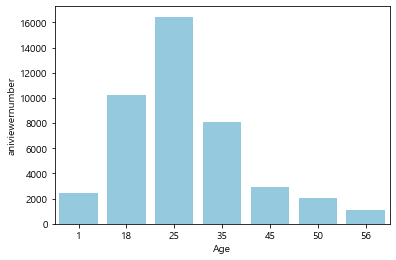

In [58]:
ax = sns.barplot(x="index", y="aniviewernumber", data=aniviewer, color = "skyblue")
ax.set(xlabel="Age")

In [59]:
viewer = pd.DataFrame(movie_rating["Age"].value_counts())
viewer.columns=["allviewernumber"]
viewer.reset_index(inplace =True)
viewer = viewer.sort_values(by="index")
viewer

,index,allviewernumber
6,1,27211
2,18,183536
0,25,395556
1,35,199003
3,45,83633
4,50,72490
5,56,38780


[Text(0.5, 0, 'Age')]

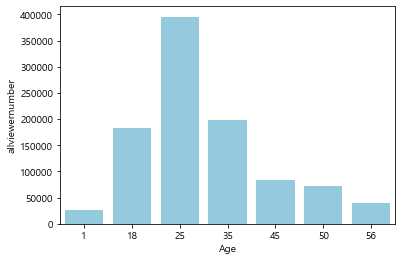

In [60]:
ax1 = sns.barplot(x="index", y="allviewernumber", data=viewer, color = "skyblue")
ax1.set(xlabel="Age")

In [61]:
viewers = viewer.merge(aniviewer, how="inner", on="index")
viewers["anipercent"]=viewers.aniviewernumber/viewers.allviewernumber*100
viewers

,index,allviewernumber,aniviewernumber,anipercent
0,1,27211,2449,9.000037
1,18,183536,10269,5.595088
2,25,395556,16454,4.159714
3,35,199003,8117,4.078833
4,45,83633,2889,3.454378
5,50,72490,2032,2.803145
6,56,38780,1083,2.792677


[Text(0.5, 0, 'Age'), Text(0, 0.5, '애니메이션 관람비율')]

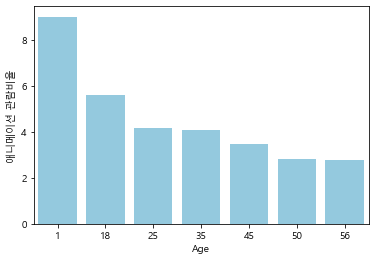

In [62]:
ax2 = sns.barplot(x="index", y="anipercent", data=viewers, color = "skyblue")
ax2.set(xlabel="Age", ylabel = "애니메이션 관람비율")

### 연령별 Animation에 관한 평점 파악

In [63]:
anirating = animation_rating.groupby(by="Age").mean()[["Rating"]]
anirating.reset_index(inplace=True)

In [64]:
anirating
anirating.sort_values(by="Rating", ascending=False)

,Age,Rating
5,50,3.780020
6,56,3.756233
3,35,3.740545
4,45,3.734856
2,25,3.701228
1,18,3.624014
0,1,3.476113


<AxesSubplot:xlabel='Age', ylabel='Rating'>

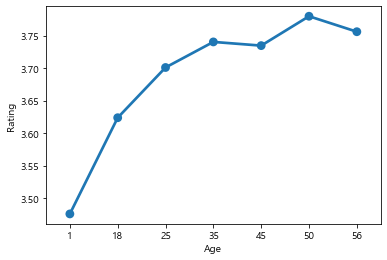

In [65]:
sns.pointplot(x="Age", y="Rating", data=anirating)

In [66]:
movie_rating = movie_rating.groupby(by="Age").mean()[["Rating"]]
movie_rating.reset_index(inplace=True)
movie_rating
movie_rating.sort_values(by="Rating", ascending=False) #

,Age,Rating
6,56,3.766632
5,50,3.714512
4,45,3.638062
3,35,3.618162
0,1,3.549520
2,25,3.545235
1,18,3.507573


In [67]:
anirating["Rating"]-movie_rating["Rating"] #25,35,18,45,50

0   -0.073408
1    0.116441
2    0.155993
3    0.122383
4    0.096795
5    0.065507
6   -0.010400
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Rating'>

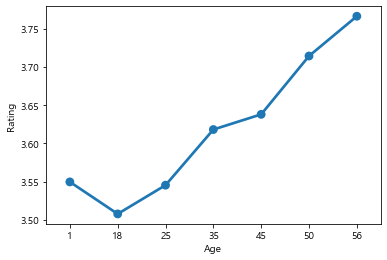

In [68]:
sns.pointplot(x="Age",y="Rating", data=movie_rating)

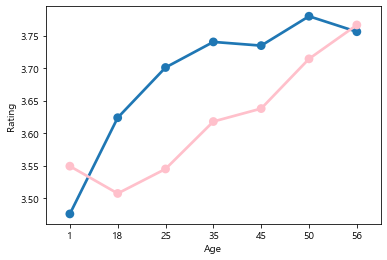

In [69]:
animation = sns.pointplot(x="Age", y="Rating", data=anirating)
all_genre = sns.pointplot(x="Age",y="Rating", data=movie_rating, color="pink")

### 연령별 애니메이션에 대한 나이와 평점, 관람인원 사이 관계

Text(0.5, 0, '나이')

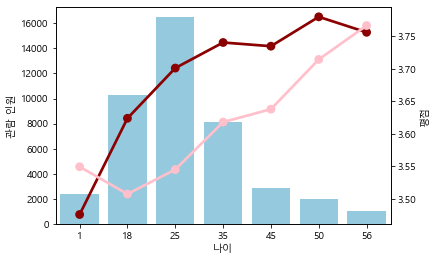

In [71]:
fig, ax = plt.subplots()

ax = sns.barplot(x="index", y="aniviewernumber", data=aniviewer, color = "skyblue")
ax1 = ax.twinx()
ax1 = sns.pointplot(x="Age", y="Rating", data=anirating, color="darkred")
ax2 = sns.pointplot(x="Age",y="Rating", data=movie_rating, color="pink")

ax.set_ylabel('관람 인원')
ax1.set_ylabel('평점')
ax.set_xlabel("나이")
#plt.legend(handles =[ax, ax1, ax2], labels = ["애니메이션 관람인원", "애니메이션 평점","전체장르 평점"])

Text(0.5, 0, '나이')

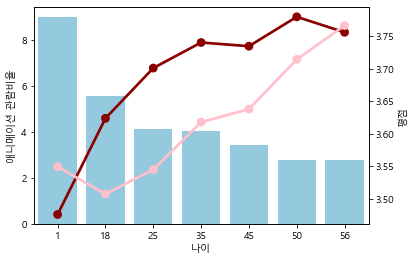

In [72]:
fig, ax = plt.subplots()

ax = sns.barplot(x="index", y="anipercent", data=viewers, color = "skyblue")
ax1 = ax.twinx()
ax1 = sns.pointplot(x="Age", y="Rating", data=anirating, color="darkred")
ax2 = sns.pointplot(x="Age",y="Rating", data=movie_rating, color="pink")

ax.set_ylabel('애니메이션 관람비율')
ax1.set_ylabel('평점')
ax.set_xlabel("나이")

Text(0.5, 0, '나이')

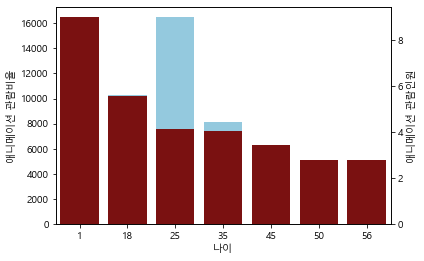

In [73]:
fig, ax = plt.subplots()

ax = sns.barplot(x="index", y="aniviewernumber", data=aniviewer, color = "skyblue")
ax1 = ax.twinx()
ax1 = sns.barplot(x="index", y="anipercent", data=viewers, color = "darkred")

ax.set_ylabel('애니메이션 관람비율')
ax1.set_ylabel("애니메이션 관람인원")
ax.set_xlabel("나이")

### 결과 해석

- 결과1. 나이 별 애니메이션 관람인원
    - 25세에서 34세 사이의 사람들이 animation을 가장 많이 관람했고 그 다음은 18세에서 24세, 35세에서 44세 순이다. 
    - animation의 주 관람층이라고 예상했던 18세 미만의 관람객은 2449명으로 5위에 그쳤다.
    - 하지만 나이별 전체장르에 따른 애니메이션 관람인원비율은 나이가 많아질 수록 적어짐을 볼 수 있다.  
    
<br/>

- 결과2. 나이별 애니메이션 평점
    - 애니메이션을 관람한 사람들의 나이대별 평점은 증가하는 추세이다.
    - 전체 영화에 대한 평점과 애니메이션을 관람한 사람들의 평점은 그 경향이 좀 다르다
        - 전체 영화에 대한 나이별 평점 또한 올라가는 추세이지만 18세에서 24사이의 사람들, 25세에서 34세의 사람들의 평점이 18세 미만의 사람들의 평점보다 작은 것이 특징이다.
        - 특히 25세에서 34세의 사람들과 18세에서 24세 사이의 사람들은 애니메이션 관람인원수가 가장 많은 두 그룹이기 때문에 더욱 의미가 있다.

<br/>

- 결과3. 나이별 애니메이션 관람인원과 평점 사이의 관계
    - 애니메이션을 본 사람들의 관람인원과 평점 사이의 관계는 평점이 전체장르에서 올라가는 경향을 보이는 것 때문에 크게 관계가 없어 보이지만 전체장르에서의 나이대별 평점을 고려하면 관람인원과 평점사이에 관계가 있다고 볼 수도 있다.

<br/>

#### 종합결과

#### 애니메이션 장르에 대한 나이별 관람인원과 평점은 어느정도 관련이 있다고 할 수 있다. animation의 주 관람층은 18세 미만이 아닌 25세에서 34세로 보인다. 하지만 이는 전체 장르에 대한 관람인원에 영향을 받은 것으로 보이며 비율로 비교했을 때, 나이가 많이질 수록 animation관람비율이 줄어드는 것을 확인할 수 있다. 따라서 animation 관람에 대한 선호도는 18세 미만이 제일 높다는 것을 알 수 있다. 

####  애니메이션을 본 사람들의 관람인원과 평점 사이의 관계는 평점이 전체장르에서 올라가는 경향을 보이는 것 때문에 크게 관계가 없어 보이지만 전체장르에서의 나이대별 평점을 고려하면 둘의 경향이 다르게 올라가는 것을 통해서 어느정도 관련이 있을 것이라고 예상할 수 있다. 

#### 추가로 애니메이션 관람에 선호도가 높은 18세 미만의 사람들은 평점을 전체 장르에 대한 평점보다 낮게준데에 비해, 56세 이상을 제외한 모든 나이대에서 애니메이션에 평점을 더 좋게 준 것으로 보아서 사람들이 애니메이션 영화에 긍정적인 반응을 보인다고 할 수 있다. 또한 25세에서 34세사이의 사람들, 35세에서 44세의 사람들, 18세에서 24세 사이의 사람들의 평점 차이가 많이 나는 것을 확인할 수 있는 것으로 보아 그들이 특히 긍정적인 반응을 보인다고 할 수 있다.

<br/>

----

## 2-3. 과학자들의 Sci-Fi 영화에 관한 평점 분석

- sci-fi를 보는 과학자들은 그 영화를 긍정적으로 생각할까, 부정적으로 생각할까
    - 본인의 지식을 바탕으로 보기때문에 부정적으로 바라보지는 않을까

### Sci-Fi 영화 뽑아내기

#### 필요한 데이터 가지고 오기
- animation을 뽑아낸 것과 같은 방식으로 뽑아냄
- 장르를 분리한 파일 부터 사용

In [74]:
moviegenre = pd.read_csv("data/movie/movie_genre.csv")
moviegenre

,MovieID,title,release_year,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story (1995),1995,Animation,Children's,Comedy,NaN,NaN,NaN
1,2,Jumanji (1995),1995,Adventure,Children's,Fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),1995,Comedy,Romance,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),1995,Comedy,Drama,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),1995,Comedy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),2000,Comedy,NaN,NaN,NaN,NaN,NaN
3879,3949,Requiem for a Dream (2000),2000,Drama,NaN,NaN,NaN,NaN,NaN
3880,3950,Tigerland (2000),2000,Drama,NaN,NaN,NaN,NaN,NaN
3881,3951,Two Family House (2000),2000,Drama,NaN,NaN,NaN,NaN,NaN


In [77]:
a = moviegenre[:][moviegenre["genre1"]=="Sci-Fi"]
b = moviegenre[:][moviegenre["genre2"]=="Sci-Fi"]
c = moviegenre[:][moviegenre["genre3"]=="Sci-Fi"]
d = moviegenre[:][moviegenre["genre4"]=="Sci-Fi"]
e = moviegenre[:][moviegenre["genre5"]=="Sci-Fi"]
f = moviegenre[:][moviegenre["genre6"]=="Sci-Fi"]

,MovieID,title,release_year,genre1,genre2,genre3,genre4,genre5,genre6


In [83]:
scimovie=pd.concat([pd.DataFrame(a["MovieID"]), pd.DataFrame(b["MovieID"]), pd.DataFrame(c["MovieID"]),pd.DataFrame(d["MovieID"]), pd.DataFrame(e["MovieID"]),pd.DataFrame(f["MovieID"])], ignore_index = True)
scimovie

,MovieID
0,66
1,76
2,185
3,338
4,519
...,...
271,2657
272,3699
273,610
274,1215


In [84]:
scimovie = scimovie.sort_values(by="MovieID")

In [85]:
scimovie.reset_index(inplace=True, drop=True)
scimovie

,MovieID
0,24
1,29
2,32
3,66
4,76
...,...
271,3931
272,3932
273,3933
274,3934


In [129]:
scimovie = pd.merge(scimovie, movie_rating, left_on='MovieID', right_on='MovieID', how='left')
scimovie

,MovieID,UserID,Gender,Age,Occupation,Rating,title,genre
0,24,5.0,M,25.0,20.0,1.0,Powder (1995),Drama|Sci-Fi
1,24,8.0,M,25.0,12.0,4.0,Powder (1995),Drama|Sci-Fi
2,24,10.0,F,35.0,1.0,3.0,Powder (1995),Drama|Sci-Fi
3,24,17.0,M,50.0,1.0,3.0,Powder (1995),Drama|Sci-Fi
4,24,39.0,M,18.0,4.0,4.0,Powder (1995),Drama|Sci-Fi
...,...,...,...,...,...,...,...,...
157291,3937,4508.0,M,25.0,20.0,2.0,Runaway (1984),Sci-Fi|Thriller
157292,3937,4979.0,M,35.0,2.0,1.0,Runaway (1984),Sci-Fi|Thriller
157293,3937,5053.0,M,25.0,4.0,4.0,Runaway (1984),Sci-Fi|Thriller
157294,3937,5312.0,M,25.0,1.0,4.0,Runaway (1984),Sci-Fi|Thriller


### Scientist가 본 Sci-Fi 뽑아내기

In [90]:
movie_rating=pd.read_csv("data/movie/movie_ratings.csv")

#genre제외하고 가져오기
#movie_rating = movie_rating[["UserID", "Gender","Age","Occupation","MovieID","Rating"]]
movie_rating

,UserID,Gender,Age,Occupation,MovieID,Rating,title,genre
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,5,Modulations (1998),Documentary
1000205,5675,M,35,14,2703,3,Broken Vessels (1998),Drama
1000206,5780,M,18,17,2845,1,White Boys (1999),Drama
1000207,5851,F,18,20,3607,5,One Little Indian (1973),Comedy|Drama|Western


In [91]:
scifi = pd.merge(scimovie, movie_rating, left_on='MovieID', right_on='MovieID', how='left')
scifi

,MovieID,UserID,Gender,Age,Occupation,Rating,title,genre
0,24,5.0,M,25.0,20.0,1.0,Powder (1995),Drama|Sci-Fi
1,24,8.0,M,25.0,12.0,4.0,Powder (1995),Drama|Sci-Fi
2,24,10.0,F,35.0,1.0,3.0,Powder (1995),Drama|Sci-Fi
3,24,17.0,M,50.0,1.0,3.0,Powder (1995),Drama|Sci-Fi
4,24,39.0,M,18.0,4.0,4.0,Powder (1995),Drama|Sci-Fi
...,...,...,...,...,...,...,...,...
157291,3937,4508.0,M,25.0,20.0,2.0,Runaway (1984),Sci-Fi|Thriller
157292,3937,4979.0,M,35.0,2.0,1.0,Runaway (1984),Sci-Fi|Thriller
157293,3937,5053.0,M,25.0,4.0,4.0,Runaway (1984),Sci-Fi|Thriller
157294,3937,5312.0,M,25.0,1.0,4.0,Runaway (1984),Sci-Fi|Thriller


In [95]:
# scientist : Occupation = 15
scientistscifi = scifi[["genre","MovieID","UserID","Rating","Occupation"]][scifi["Occupation"]== 15]
scientistscifi

,genre,MovieID,UserID,Rating,Occupation
109,Drama|Sci-Fi,24,999.0,3.0,15.0
126,Drama|Sci-Fi,24,1151.0,2.0,15.0
328,Drama|Sci-Fi,24,3163.0,4.0,15.0
446,Drama|Sci-Fi,24,4205.0,3.0,15.0
500,Drama|Sci-Fi,24,4605.0,2.0,15.0
...,...,...,...,...,...
156986,Horror|Sci-Fi,3932,1623.0,4.0,15.0
157029,Horror|Sci-Fi,3932,2069.0,4.0,15.0
157058,Horror|Sci-Fi,3932,2466.0,3.0,15.0
157131,Horror|Sci-Fi,3933,5034.0,4.0,15.0


### Scientist가 본 Sci-Fi 평점 뽑아내기

In [100]:
scientistscifi["Rating"].mean()

3.5295641931684334

In [96]:
scientistsf = scientistscifi.groupby(by="MovieID").mean()

In [98]:
del scientistsf["UserID"]
del scientistsf["Occupation"]
scientistsf

,Rating
MovieID,
24,2.750000
29,4.300000
32,3.918367
66,2.000000
76,4.000000
...,...
3926,3.000000
3927,3.250000
3932,3.666667


In [99]:
scientistsf.reset_index(inplace=True)
scientistsf

,MovieID,Rating
0,24,2.750000
1,29,4.300000
2,32,3.918367
3,66,2.000000
4,76,4.000000
...,...,...
237,3926,3.000000
238,3927,3.250000
239,3932,3.666667
240,3933,4.000000


In [110]:
sci = scientistscifi["Rating"].value_counts()
sci

4.0    1381
3.0    1073
5.0     961
2.0     605
1.0     225
Name: Rating, dtype: int64

In [111]:
sci = pd.DataFrame(sci)

In [113]:
sci.columns = ["count"]
sci.reset_index(inplace = True)
sci.columns = ["Rating","count"]
sci

,Rating,count
0,4.0,1381
1,3.0,1073
2,5.0,961
3,2.0,605
4,1.0,225


In [116]:
sci["ratingpercent"]=sci["count"]/4245*100
sci

,Rating,count,ratingpercent
0,4.0,1381,32.532391
1,3.0,1073,25.276796
2,5.0,961,22.638398
3,2.0,605,14.252061
4,1.0,225,5.300353


In [126]:
sci["genre"]=["Sci-Fi","Sci-Fi","Sci-Fi","Sci-Fi","Sci-Fi"]
sci

,Rating,count,ratingpercent,genre
0,4.0,1381,32.532391,Sci-Fi
1,3.0,1073,25.276796,Sci-Fi
2,5.0,961,22.638398,Sci-Fi
3,2.0,605,14.252061,Sci-Fi
4,1.0,225,5.300353,Sci-Fi


### Scientist들이 본 전체 영화 뽑아내기

In [103]:
scientist = movie_rating[["genre","MovieID","UserID","Rating","Occupation"]][movie_rating["Occupation"]== 15]
scientist

,genre,MovieID,UserID,Rating,Occupation
31,Drama,1193,109,2,15
109,Drama,1193,366,4,15
165,Drama,1193,560,5,15
215,Drama,1193,760,5,15
261,Drama,1193,929,4,15
...,...,...,...,...,...
999971,Documentary,3890,2104,3,15
1000070,Western,3373,5583,2,15
1000100,Drama,1139,4681,4,15
1000172,Drama,2480,4751,5,15


In [104]:
scientist.reset_index(drop=True, inplace=True)
scientist

,genre,MovieID,UserID,Rating,Occupation
0,Drama,1193,109,2,15
1,Drama,1193,366,4,15
2,Drama,1193,560,5,15
3,Drama,1193,760,5,15
4,Drama,1193,929,4,15
...,...,...,...,...,...
22946,Documentary,3890,2104,3,15
22947,Western,3373,5583,2,15
22948,Drama,1139,4681,4,15
22949,Drama,2480,4751,5,15


### scientist가 본 영화 중 Sci-Fi가 아닌 영화 뽑아내기

In [105]:
notscifi = pd.concat([scientist, scientistscifi, scientistscifi]).drop_duplicates(keep=False)
notscifi

,genre,MovieID,UserID,Rating,Occupation
0,Drama,1193,109.0,2.0,15.0
1,Drama,1193,366.0,4.0,15.0
2,Drama,1193,560.0,5.0,15.0
3,Drama,1193,760.0,5.0,15.0
4,Drama,1193,929.0,4.0,15.0
...,...,...,...,...,...
22946,Documentary,3890,2104.0,3.0,15.0
22947,Western,3373,5583.0,2.0,15.0
22948,Drama,1139,4681.0,4.0,15.0
22949,Drama,2480,4751.0,5.0,15.0


In [106]:
notscifi["Rating"].mean()

3.7261306532663316

In [117]:
data = { "Sci-Fi": [scientistscifi["Rating"].mean()],
       "Sci-Fi제외 장르" : [notscifi["Rating"].mean()] }
scientistR = pd.DataFrame(data)

In [118]:
scientistR = scientistR.T
scientistR.columns = ["평점"]
scientistR

,평점
Sci-Fi,3.529564
Sci-Fi제외 장르,3.726131


<AxesSubplot:>

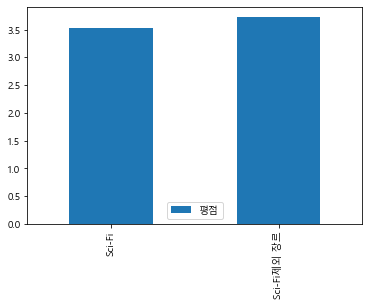

In [119]:
scientistR.plot.bar()

In [123]:
notsci = pd.DataFrame(notscifi["Rating"].value_counts())
notsci.columns = ["count"]
notsci.reset_index(inplace=True)
notsci.columns = ["Rating","count"]
notsci

,Rating,count
0,4.0,7187
1,5.0,4693
2,3.0,4498
3,2.0,1666
4,1.0,662


In [124]:
notsci["ratingpercent"]=notsci["count"]/18706*100
notsci

,Rating,count,ratingpercent
0,4.0,7187,38.420828
1,5.0,4693,25.088207
2,3.0,4498,24.045761
3,2.0,1666,8.906233
4,1.0,662,3.538971


In [125]:
notsci["genre"]=["not Sci-Fi","not Sci-Fi","not Sci-Fi","not Sci-Fi","not Sci-Fi"]
notsci

,Rating,count,ratingpercent,genre
0,4.0,7187,38.420828,not Sci-Fi
1,5.0,4693,25.088207,not Sci-Fi
2,3.0,4498,24.045761,not Sci-Fi
3,2.0,1666,8.906233,not Sci-Fi
4,1.0,662,3.538971,not Sci-Fi


In [127]:
scientist1 =pd.concat([sci, notsci], ignore_index = True)
scientist1

,Rating,count,ratingpercent,genre
0,4.0,1381,32.532391,Sci-Fi
1,3.0,1073,25.276796,Sci-Fi
2,5.0,961,22.638398,Sci-Fi
3,2.0,605,14.252061,Sci-Fi
4,1.0,225,5.300353,Sci-Fi
5,4.0,7187,38.420828,not Sci-Fi
6,5.0,4693,25.088207,not Sci-Fi
7,3.0,4498,24.045761,not Sci-Fi
8,2.0,1666,8.906233,not Sci-Fi
9,1.0,662,3.538971,not Sci-Fi


<AxesSubplot:xlabel='Rating', ylabel='ratingpercent'>

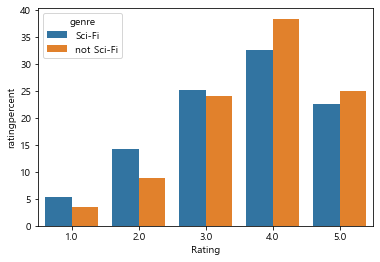

In [128]:
sns.barplot(data=scientist1, x="Rating", y="ratingpercent", hue="genre")

### scientist가 아닌 사람들의 Sci-Fi의 평점 비율

In [130]:
notscientist = scifi[["genre","MovieID","UserID","Rating","Occupation"]][scifi["Occupation"]!= 15]
notscientist

,genre,MovieID,UserID,Rating,Occupation
0,Drama|Sci-Fi,24,5.0,1.0,20.0
1,Drama|Sci-Fi,24,8.0,4.0,12.0
2,Drama|Sci-Fi,24,10.0,3.0,1.0
3,Drama|Sci-Fi,24,17.0,3.0,1.0
4,Drama|Sci-Fi,24,39.0,4.0,4.0
...,...,...,...,...,...
157291,Sci-Fi|Thriller,3937,4508.0,2.0,20.0
157292,Sci-Fi|Thriller,3937,4979.0,1.0,2.0
157293,Sci-Fi|Thriller,3937,5053.0,4.0,4.0
157294,Sci-Fi|Thriller,3937,5312.0,4.0,1.0


In [132]:
a = notscientist["Rating"].value_counts()
notscientist = pd.DataFrame(a)
notscientist.columns = ["count"]
notscientist.reset_index(inplace = True)
notscientist

,index,count
0,4.0,49375
1,3.0,41819
2,5.0,31480
3,2.0,19548
4,1.0,10827


In [133]:
notscientist.columns = ["Rating","count"]
notscientist["ratingpercent"]=notscientist["count"]/150351*100
notscientist

,Rating,count,ratingpercent
0,4.0,49375,32.839821
1,3.0,41819,27.814248
2,5.0,31480,20.937673
3,2.0,19548,13.001576
4,1.0,10827,7.201149


In [135]:
del sci["genre"]
sci

,Rating,count,ratingpercent
0,4.0,1381,32.532391
1,3.0,1073,25.276796
2,5.0,961,22.638398
3,2.0,605,14.252061
4,1.0,225,5.300353


In [136]:
sci["occupation"]=["scientist","scientist","scientist","scientist","scientist"]
sci

,Rating,count,ratingpercent,occupation
0,4.0,1381,32.532391,scientist
1,3.0,1073,25.276796,scientist
2,5.0,961,22.638398,scientist
3,2.0,605,14.252061,scientist
4,1.0,225,5.300353,scientist


In [137]:
notscientist["occupation"]=["notscientist","notscientist","notscientist","notscientist","notscientist"]
notscientist

,Rating,count,ratingpercent,occupation
0,4.0,49375,32.839821,notscientist
1,3.0,41819,27.814248,notscientist
2,5.0,31480,20.937673,notscientist
3,2.0,19548,13.001576,notscientist
4,1.0,10827,7.201149,notscientist


In [138]:
scifimovie =pd.concat([sci, notscientist], ignore_index = True)
scifimovie

,Rating,count,ratingpercent,occupation
0,4.0,1381,32.532391,scientist
1,3.0,1073,25.276796,scientist
2,5.0,961,22.638398,scientist
3,2.0,605,14.252061,scientist
4,1.0,225,5.300353,scientist
5,4.0,49375,32.839821,notscientist
6,3.0,41819,27.814248,notscientist
7,5.0,31480,20.937673,notscientist
8,2.0,19548,13.001576,notscientist
9,1.0,10827,7.201149,notscientist


<AxesSubplot:xlabel='Rating', ylabel='ratingpercent'>

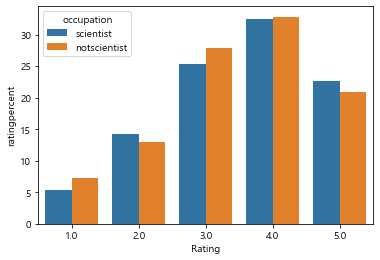

In [139]:
sns.barplot(data=scifimovie, x="Rating", y="ratingpercent", hue="occupation")

### 결과 해석

- 결과 1. scientist들이 평가한 scifi와 scifi가 아닌 영화의 평점평균 차이 비교
    - 3.529564, 3.726131로 scifi가 적긴 하지만 1.056배 차이로 큰 차이가 없어보인다.

<br/>

- 결과 2. scientist들이 평가한 scifi와 scifi가 아닌 영화들의 각 Rating별 비율 비교
    - 1, 2, 3점은 scifi인 영화가 많고, 4, 5점은 scifi가 아닌 영화들이 많으므로 유의미한 결과라고 볼 수  있다.(점수를 적게 주는 비율이 높다)
    
<br/>

- 결과 3. scifi영화에 대해서 scientist들과 scientist가 아닌 사람들의 각 Rating별 비율 비교
    - 큰 차이가 없고 Rating이 작고 큰 것에 따라 비율의 경향이 나타나는게 아닌 무작위로 나타나므로 직업에 의한 차이는 없다
    
<br/>

#### 종합결과

#### scientist들은 sci-fi영화에 대하여 전체적으로 1.056배 작은 평점을 주어 큰 차이가 없어 보이지만 각 점수 별 비율을 확인했을 때 낮은 점수인 1, 2, 3점에서는 sci-fi영화가 더 많은 비율을 차지했고, 높은 점수인 4,5점에서는 sci-fi가 아닌 영화가 더 많은 비율을 차지해서 scientist들은 sci-fi영화에 좀 더 낮은 점수를 준다고 볼 수 있다.

In [140]:
3.726131/3.529564

1.0556915811697989